In [1]:
import numpy as np
import cv2
from IPython.display import display, clear_output
from matplotlib import pyplot as plt
import math

In [4]:

image = cv2.imread('./capture_mire_0.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #conversion en n&b
image1 = cv2.imread('./capture_mire_1.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #conversion en n&b
h = gray.shape[0]
l = gray.shape[1]

In [27]:
focale = 4.4
coord_px = []
coord_mm = []
coord_px1 = cv2.findChessboardCorners(image, (7,7))[1]
coord_px2 = cv2.findChessboardCorners(image1, (7,7))[1]
scaling = 20
for k in range(7):
    for i in range(7):
        coord_mm.append([i *scaling, k*scaling])
for k in range(49):
        coord_px.append([coord_px1[k][0][0],coord_px1[k][0][1]])
for k in range(49):
        coord_px.append([coord_px2[k][0][0],coord_px2[k][0][1]])
coord_mm

[[0, 0],
 [20, 0],
 [40, 0],
 [60, 0],
 [80, 0],
 [100, 0],
 [120, 0],
 [0, 20],
 [20, 20],
 [40, 20],
 [60, 20],
 [80, 20],
 [100, 20],
 [120, 20],
 [0, 40],
 [20, 40],
 [40, 40],
 [60, 40],
 [80, 40],
 [100, 40],
 [120, 40],
 [0, 60],
 [20, 60],
 [40, 60],
 [60, 60],
 [80, 60],
 [100, 60],
 [120, 60],
 [0, 80],
 [20, 80],
 [40, 80],
 [60, 80],
 [80, 80],
 [100, 80],
 [120, 80],
 [0, 100],
 [20, 100],
 [40, 100],
 [60, 100],
 [80, 100],
 [100, 100],
 [120, 100],
 [0, 120],
 [20, 120],
 [40, 120],
 [60, 120],
 [80, 120],
 [100, 120],
 [120, 120]]

In [31]:
U1 = []
U2 = []
for i in range(98):
    U1.append(coord_px[i][0] - h/2)
    U2.append(coord_px[i][1] - l/2)
print(U1)
# print(U2)

[-17.236114501953125, 21.52191162109375, 56.620941162109375, 90.08285522460938, 121.52090454101562, 152.52084350585938, 182.58364868164062, -19.081588745117188, 20.510589599609375, 56.4205322265625, 90.19863891601562, 122.03271484375, 153.44253540039062, 184.21524047851562, -20.968658447265625, 19.4027099609375, 55.890960693359375, 90.09738159179688, 122.4627685546875, 154.56765747070312, 185.71688842773438, -22.41351318359375, 17.351043701171875, 54.10418701171875, 89.55819702148438, 122.92776489257812, 155.87655639648438, 187.68572998046875, -23.831588745117188, 15.01373291015625, 52.53643798828125, 88.71194458007812, 123.740478515625, 157.36813354492188, 189.81808471679688, -26.063323974609375, 14.431121826171875, 51.752777099609375, 89.05795288085938, 125.10684204101562, 159.27334594726562, 192.17031860351562, -27.438720703125, 12.541015625, 51.433868408203125, 89.47186279296875, 126.2764892578125, 161.35009765625, 194.26675415039062, -21.345565795898438, 8.29229736328125, 35.47796

In [34]:
A = []
for k in range(49):
    vec = [U2[k] * coord_mm[k][0], U2[k] * coord_mm[k][1], 0, U2[k], -U1[k]* coord_mm[k][0] ,-U1[k]* coord_mm[k][1], 0]
    A.append(vec)
for k in range(49):
    vec = [U2[k+49] * coord_mm[k][0], U2[k] * coord_mm[k][1],  U2[k+49] * 120 , U2[k+49], -U1[k+49]* coord_mm[k][0] ,-U1[k+49]* coord_mm[k][1],  -U1[k+49] * 120]
    A.append(vec)
A

[[-0.0, -0.0, 0, -229.6382827758789, 0.0, 0.0, 0],
 [-4381.729736328125,
  -0.0,
  0,
  -219.08648681640625,
  -430.438232421875,
  -0.0,
  0],
 [-8318.954162597656,
  -0.0,
  0,
  -207.9738540649414,
  -2264.837646484375,
  -0.0,
  0],
 [-11836.032257080078,
  -0.0,
  0,
  -197.26720428466797,
  -5404.9713134765625,
  -0.0,
  0],
 [-14964.30419921875,
  -0.0,
  0,
  -187.05380249023438,
  -9721.67236328125,
  -0.0,
  0],
 [-17807.513427734375,
  -0.0,
  0,
  -178.07513427734375,
  -15252.084350585938,
  -0.0,
  0],
 [-20339.9267578125,
  -0.0,
  0,
  -169.4993896484375,
  -21910.037841796875,
  -0.0,
  0],
 [-0.0,
  -3830.0079345703125,
  0,
  -191.50039672851562,
  0.0,
  381.63177490234375,
  0],
 [-3640.0711059570312,
  -3640.0711059570312,
  0,
  -182.00355529785156,
  -410.2117919921875,
  -410.2117919921875,
  0],
 [-6870.721435546875,
  -3435.3607177734375,
  0,
  -171.76803588867188,
  -2256.8212890625,
  -1128.41064453125,
  0],
 [-9700.0048828125,
  -3233.3349609375,
  0,
  

In [35]:
A_ps = np.linalg.pinv(A)
L = np.dot(A_ps,U1)
print(L)

[-0.00826891  0.00018886  0.00046827  0.07428703 -0.00116896 -0.00903977
 -0.00255808]


In [43]:
abs_oc2 = 1/math.sqrt(L[4]*L[4] + L[5]*L[5] + L[6]*L[6])
beta = abs_oc2 * math.sqrt(L[0]*L[0] + L[1]*L[1] + L[2]*L[2])
oc2 = abs_oc2
oc1 = (L[3] * oc2)/beta
r11 = (L[0] * oc2)/beta
r12 = (L[1] * oc2)/beta
r13 = (L[2] * oc2)/beta

r21 = (L[4] * oc2)
r22 = (L[5] * oc2)
r23 = (L[6] * oc2)

ligne_1 = (r11, r12, r13)
ligne_2 = (r21, r22, r23)
ligne_3 = np.cross(ligne_1, ligne_2)
#ligne_3 = np.cross(np.array((r11, r12, r13)).transpose(),np.array((r21 ,r22, r23)).transpose())
r31 = ligne_3[0]
r32 = ligne_3[1]
r33 =  ligne_3[2]

phi = -math.atan(r23/r33)
gamma = -math.atan(r12/r11)
w = math.atan(r13/(-r23*math.sin(phi) + r33*math.cos(phi)))

print(phi*180/np.pi)
print(gamma*180/np.pi)
print(w*180/np.pi)
r11,oc2,r11, r12, r13,r21, r22, r23

15.784187167430925
1.3084065640748732
3.256810323894631


(-0.9981408792131958,
 105.62798392372956,
 -0.9981408792131958,
 0.02279751058680624,
 0.05652485076984402,
 -0.12347495962720455,
 -0.9548523646876613,
 -0.2702052849139728)

In [50]:
B = []
R = []
for k in range(49):
    vec = [U2[k], -(r21*coord_mm[k][0] + r22*coord_mm[k][1]+ oc2)]
    B.append(vec)
for k in range(49):
    vec = [U2[k+49], -(r21*coord_mm[k][0] + r22*coord_mm[k][1] + r23*120 + oc2)]
    B.append(vec)
for k in range(49):
    R.append(-U2[k]*(r31*coord_mm[k][0] + r32*coord_mm[k][1] ))
for k in range(49):
    R.append(-U2[k+49]*(r31*coord_mm[k][0] + r32*coord_mm[k][1] + r33*120))
R

[0.0,
 209.5031162253706,
 397.75315358923234,
 565.9147849863172,
 715.4864746422959,
 851.428495099705,
 972.5104686918583,
 -1059.6955740966155,
 -833.101125639783,
 -621.994680364182,
 -430.8215315945535,
 -259.7728821120066,
 -108.13649967290306,
 27.75618151554041,
 -1677.822406065899,
 -1451.095533996408,
 -1226.4390178800936,
 -1022.6320133421591,
 -839.9891737756188,
 -681.327313592497,
 -540.4166752272562,
 -1850.785516814919,
 -1607.489514160817,
 -1385.4101572034833,
 -1184.3959179186809,
 -1004.793295592348,
 -848.5928458191424,
 -713.3739411062601,
 -1537.3557920207463,
 -1301.418975176229,
 -1081.249548755502,
 -901.1078049602061,
 -736.277426426054,
 -598.7439121669597,
 -476.6921548049135,
 -706.6976058635324,
 -493.8031079983291,
 -301.1740251461922,
 -149.43628242805136,
 -14.34390508259219,
 98.89552383916055,
 199.44357964138732,
 663.4925027033999,
 848.958939712891,
 990.2585936671852,
 1102.9521128048293,
 1189.3948943164921,
 1265.760667066068,
 1327.6149946073

In [53]:
B_ps = np.linalg.pinv(B)
M = np.dot(B_ps,R)

s2 = focale/M[1]
s1 = s2/beta

print(" beta =", beta, "\n")
print(" oc1 =", oc1, "\n", "oc2 =", oc2, "\n", "oc3 =", M[0], "\n")
print(" r11 =", r11, "\n", "r12 =", r12, "\n","r13 =", r13, "\n")
print(" r21 =", r21, "\n", "r22 =", r22, "\n","r23 =", r23, "\n") 
print(" r31 =", r31, "\n", "r32 =", r32, "\n","r33 =", r33, "\n") 

 beta = 0.8750553332124628 

 oc1 = 8.967191683922898 
 oc2 = 105.62798392372956 
 oc3 = 339.57461067978386 

 r11 = -0.9981408792131958 
 r12 = 0.02279751058680624 
 r13 = 0.05652485076984402 

 r21 = -0.12347495962720455 
 r22 = -0.9548523646876613 
 r23 = -0.2702052849139728 

 r31 = 0.04781287957776545 
 r32 = -0.27668234431882516 
 r33 = 0.955892100507448 



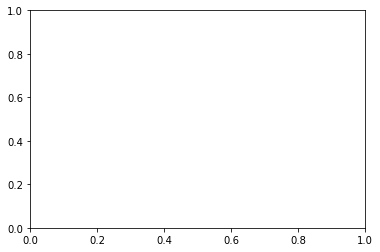

In [12]:
cap = cv2.VideoCapture(0)
k = 0
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

while(True):
    ret, frame = cap.read() #1 frame acquise à chaque iteration
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY) #conversion en n&b
    cv2.imshow('Capture_Video', gray) #affichage

    
    coord_px = cv2.findChessboardCorners(image, (7,7))
    #A = np.linalg.pinv(coord_px) * coord_mm[1]

    key = cv2.waitKey(1) #on évalue la touche pressée

    if key & 0xFF == ord('q'): #si appui sur 'q'
        break #sortie de la boucle while

    if key & 0xFF == ord('c'): #si appui sur 'c'
        cv2.imwrite('../data/image_' + str(k) + '.png', gray)   #enregistrement de la boucle while
        k+=1


cap.release()
cv2.destroyAllWindows()